In [274]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from matplotlib import pyplot as plt
from matplotlib import cm
import os
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [275]:
np.nan<0

False

In [276]:
#Set step, paths, pfts and run all

STEP = 4

STEP1_results = '/data/workflows/US-Prr-STEP1-SA/results.csv'
STEP1_sample_matrix = '/data/workflows/US-Prr-STEP1-SA/sample_matrix.csv'

STEP2_results = '/data/workflows/US-Prr-STEP2-SA/results.csv'
STEP2_sample_matrix = '/data/workflows/US-Prr-STEP2-SA/sample_matrix.csv'

STEP3_results = '/data/workflows/US-Prr-STEP3-SA-v2/results.csv'
STEP3_sample_matrix = '/data/workflows/US-Prr-STEP3-SA-v2/sample_matrix.csv'

#STEP3_results = 'results_US-Prr_STEP3.csv'
#STEP3_sample_matrix = 'sample_matrix_US-Prr_STEP3.csv'

STEP4_results = '/data/workflows/US-Prr-STEP4-SA/results.csv'
STEP4_sample_matrix = '/data/workflows/US-Prr-STEP4-SA/sample_matrix.csv'

#STEP4_results = '/data/workflows/US-Prr-STEP4-SA/results.csv'
#STEP4_sample_matrix = '/data/workflows/US-Prr-STEP4-SA/sample_matrix.csv'

pfts=['Black Spruce', 'Moss (Sphagnum dominant)', 'Shrubs (Deciduous Dominant)', 'Tussock Cottongrass', 'Reindeer Lichen']

In [277]:
if STEP == 3:
    target_vars = [
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=[
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','sudocfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']

In [278]:
#if number of pfts != 5 you will have to adjust these values

if STEP == 1:
    target_vars = ['GPP1', 'GPP2', 'GPP3', 'GPP4', 'GPP5']
    
    calib_params = [['cmax', 'cmax.1', 'cmax.2', 'cmax.3', 'cmax.4']] # here for reference
    
    vars_nopft= ['GPP']

if STEP == 2:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5']
    
    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1'],
                    ['krb(2)','krb(2).1','krb(2).2']]
    
    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
if STEP == 3:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1'],
                    ['krb(2)','krb(2).1','krb(2).2'],
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4', # here for reference
                    'krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4',
                    'krb(1)','krb(1).1',
                    'krb(2)','krb(2).1','krb(2).2',
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','cfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']
    
    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 4:
    target_vars = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']
    
    calib_params = [['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']] # here for reference
    calib_params_flat = ['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
    vars_nopft= ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']


In [279]:
def Filter(string_list, substr):
    """ filters list of strings for items containing substring """
    return [str for str in string_list if
             any(sub in str for sub in substr)]

In [280]:
def calc_rmse(x,y):
    """ Return rmse where x and y are array-like """
    return ((x-y) ** 2).mean() ** .5

In [281]:
def calc_overall_accuracy(results, sample_matrix, target_vars, vars_nopft):
    
    results = pd.read_csv(results, names=target_vars)
    #print(results)
    # extract targets from last row of results csv
    targets = results.loc[len(results)-1] 
    results = results.loc[0:len(results)-2]
    
    r2s = []
    rmses=[]
    
    #calculate r2s and rmse for individual variables 
    for index, row in results.iterrows():
        
        tgt_r2s = []
        tgt_rmses = []
        
        for var_nopft in vars_nopft:
            
            results_vars_cols = Filter(results, [var_nopft])
            if row[results_vars_cols].isna().values.any():
                tgt_r2s.append(0)
                tgt_rmses.append(10000000)
                continue
            tgt_r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
            tgt_rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))  
            
        #r2s.append(tgt_r2s)
        #rmses.append(tgt_rmses)
        r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
        rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))

    # concatenate sample matrix to results
    sample_matrix = pd.read_csv(sample_matrix)
    results[sample_matrix.columns] = sample_matrix
    r2s=np.array(r2s)
    rmses=np.array(rmses)
    results['r2']= r2s
    results['rmse']= rmses
    #iterate over target variables (no pft or compartment)
    #for idx, name in enumerate(vars_nopft):
        
        #set r2 and rmse columns
    #    results[name + '_r2_raw'] = r2s[:, idx]
    #    results[name + '_rmse_raw'] = rmses[:, idx]
        
    #    #scale rmse between min and max
    #    results[name + '_rmse_scaled'] = (results[name + '_rmse_raw']-np.nanmin(results[name + '_rmse_raw']))/(np.max(results[name + '_rmse_raw'])-np.nanmin(results[name + '_rmse_raw']))
        
    #    #subrtact scaled rmse from r2 for overall accuracy term
    #    results[name + '_accuracy'] = (results[name + '_r2_raw']-results[name+'_rmse_scaled'])
    
    #scale r2 and rmse and combine for overall accuracy term
    results['rmse_scaled'] = (results['rmse']-np.nanmin(results['rmse']))/(np.max(results['rmse'])-np.nanmin(results['rmse']))
    results['overall_accuracy'] = (results['r2']-results['rmse_scaled'])
    results['mean_rmse'] = results[Filter(list(results.columns), ['rmse'])].mean(axis=1)
    results['mean_r2'] = results[Filter(list(results.columns), ['r2'])].mean(axis=1)
    
    return results, targets

In [282]:
if STEP == 1:
    results, targets = calc_overall_accuracy(STEP1_results, STEP1_sample_matrix, target_vars, vars_nopft)
if STEP == 2:
    results, targets = calc_overall_accuracy(STEP2_results, STEP2_sample_matrix, target_vars, vars_nopft)
    
if STEP == 3:
    results, targets = calc_overall_accuracy(STEP3_results, STEP3_sample_matrix, target_vars, vars_nopft)

if STEP == 4:
    results, targets = calc_overall_accuracy(STEP4_results, STEP4_sample_matrix, target_vars, vars_nopft)

print('{} runs'.format(len(results)))


/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

500 runs


/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [283]:
results['mean_r2']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
Name: mean_r2, Length: 500, dtype: float64

In [284]:
#get indices of top 15 performing parameter sets
perf = np.argsort(results['overall_accuracy'])[::-1]
#perf = np.argsort(results['mean_rmse'])[::-1]
top = perf[:20].values.tolist()
first = perf[:1].values.tolist()

(0.0, 1.0)

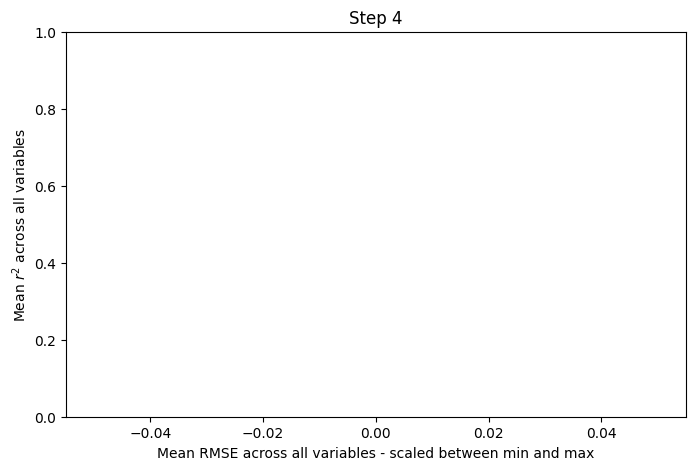

In [285]:
fig, ax = plt.subplots(figsize = (8,5))

sns.scatterplot(data = results, x='mean_rmse', y='mean_r2')
sns.scatterplot(data = results.iloc[top], x='mean_rmse', y='mean_r2', color='red')
sns.scatterplot(data = results.iloc[first], x='mean_rmse', y='mean_r2', color='yellow')

ax.title.set_text('Step {}'.format(STEP))
ax.set_ylabel('Mean $r^2$ across all variables')
ax.set_xlabel('Mean RMSE across all variables - scaled between min and max')
plt.ylim(0,1)
#plt.xlim(0,1)

In [174]:
results.columns

Index(['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5', 'VegCarbonLeaf1',
       'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
       'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4', 'VegCarbonRoot4',
       'VegCarbonLeaf5', 'VegNitrogenLeaf1', 'VegNitrogenStem1',
       'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
       'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
       'VegNitrogenRoot4', 'VegNitrogenLeaf5', 'nmax', 'nmax.1', 'nmax.2',
       'nmax.3', 'nmax.4', 'krb(0)', 'krb(0).1', 'krb(0).2', 'krb(0).3',
       'krb(0).4', 'krb(1)', 'krb(1).1', 'krb(2)', 'krb(2).1', 'krb(2).2',
       'cfall(0)', 'cfall(0).1', 'cfall(0).2', 'cfall(0).3', 'cfall(0).4',
       'cfall(1)', 'cfall(1).1', 'cfall(2)', 'cfall(2).1', 'cfall(2).2',
       'nfall(0)', 'nfall(0).1', 'nfall(0).2', 'nfall(0).3', 'nfall(0).4',
       'nfall(1)', 'nfall(1).1', 'nfall(2)', 'nfall(2).1', 'nfall(2).2', 'r2',
       'rmse', 'rmse_scaled', 'overall

In [175]:
palette = sns.color_palette("mako", as_cmap=True)

if STEP == 1:
    fig, axes = plt.subplots(2,3, figsize = (8,5))
    fig.suptitle('STEP 1 cmax vs GPP for each PFT')

    axes[0,0].axhline(targets['GPP1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax', y='GPP1', ax=axes[0,0], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax', y='GPP1', ax=axes[0,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax', y='GPP1', ax=axes[0,0], color='yellow', legend=False)
    axes[0,0].title.set_text(pfts[0])

    axes[0,1].axhline(targets['GPP2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.1', y='GPP2', ax=axes[0,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.1', y='GPP2', ax=axes[0,1], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.1', y='GPP2', ax=axes[0,1], color='yellow', legend=False)
    axes[0,1].title.set_text(pfts[1])

    axes[0,2].axhline(targets['GPP3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.2', y='GPP3', ax=axes[0,2], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.2', y='GPP3', ax=axes[0,2], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.2', y='GPP3', ax=axes[0,2], color='yellow', legend=False)
    axes[0,2].title.set_text(pfts[2])

    axes[1,0].axhline(targets['GPP4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.3', y='GPP4', ax=axes[1,0], alpha=0.05, palette=palette)
    sns.scatterplot(data = results.iloc[top], x='cmax.3', y='GPP4', ax=axes[1,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.3', y='GPP4', ax=axes[1,0], color='yellow', legend=False)
    axes[1,0].title.set_text(pfts[3])

    axes[1,1].axhline(targets['GPP5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.4', y='GPP5', ax=axes[1,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.4', y='GPP5', ax=axes[1,1], color='red', label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='cmax.4', y='GPP5', ax=axes[1,1], color='yellow', label='Top run')
    axes[1,1].title.set_text(pfts[4])

    #axes[1,1].legend(loc='lower right', bbox_to_anchor=(1,0), title='Overall Accuracy')
   
    fig.tight_layout()


In [176]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['NPPAll1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax', y='NPPAll1', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nmax', y='NPPAll1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax', y='NPPAll1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')

    axes[0,1].axhline(targets['NPPAll2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.1', y='NPPAll2', ax=axes[0,1], hue='krb(0).1', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.1', y='NPPAll2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax.1', y='NPPAll2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss (Sphagnum dominant)')

    axes[0,2].axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.2', y='NPPAll3', ax=axes[0,2], hue='krb(0).2', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.2', y='NPPAll3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax.2', y='NPPAll3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrubs (Evergreen Dominant)')

    axes[1,0].axhline(targets['NPPAll4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.3', y='NPPAll4', ax=axes[1,0], hue='krb(0).3', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.3', y='NPPAll4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax.3', y='NPPAll4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('Tussock Cottongrass')

    axes[1,1].axhline(targets['NPPAll5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.4', y='NPPAll5', ax=axes[1,1], hue='krb(0).4', legend=True, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.4', y='NPPAll5', ax=axes[1,1], color='red',label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='nmax.4', y='NPPAll5', ax=axes[1,1], color='yellow',label='Top run')
    axes[1,1].title.set_text('Reindeer Lichen')

    axes[1,1].legend(loc='lower right', bbox_to_anchor=(0,-.5), title='krb(0)')

    fig.tight_layout()


In [177]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 VEGC for Black Spruce')

    axes[0,0].axhline(targets['VegCarbonLeaf1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='VegCarbonLeaf1', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')

    axes[0,1].axhline(targets['VegCarbonStem1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='VegCarbonStem1', ax=axes[0,1], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='VegCarbonStem1', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='VegCarbonStem1', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Black Spruce')
    
    axes[0,2].axhline(targets['VegCarbonRoot1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='VegCarbonRoot1', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='VegCarbonRoot1', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='VegCarbonRoot1', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Black Spruce')


    fig.tight_layout()


In [178]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], hue='krb(0).1', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Moss')


    fig.tight_layout()

In [179]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Shrub')

    axes[0,1].axhline(targets['VegCarbonStem3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Shrub')
    
    axes[0,2].axhline(targets['VegCarbonRoot3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')


    fig.tight_layout()

In [180]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Sedge')


    
    axes[0,2].axhline(targets['VegCarbonRoot4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Sedge')


    fig.tight_layout()

In [181]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], hue='krb(0).1', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Lichen')


    fig.tight_layout()

In [182]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 krb(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['NPPAll1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='NPPAll1', ax=axes[0,0], hue='krb(2)', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    axes[0,0].set_xlim(-8,0)

    axes[0,1].axhline(targets['NPPAll2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='NPPAll2', ax=axes[0,1], hue='krb(2)', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss (Sphagnum dominant)')
    axes[0,1].set_xlim(-5,0)
    
    axes[0,2].axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='NPPAll3', ax=axes[0,2], hue='krb(2).1', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrubs (Evergreen Dominant)')
    axes[0,2].set_xlim(-5,0)

    axes[1,0].axhline(targets['NPPAll4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='NPPAll4', ax=axes[1,0], hue='krb(2).2', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('Tussock Cottongrass')
    axes[1,0].set_xlim(-5,0)

    axes[1,1].axhline(targets['NPPAll5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='NPPAll5', ax=axes[1,1], hue='krb(2)', legend=True, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='red',label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='yellow',label='Top run')
    axes[1,1].title.set_text('Reindeer Lichen')
    axes[1,1].set_xlim(-5,0)

    axes[1,1].legend(loc='lower right', bbox_to_anchor=(0,-.5), title='krb(2)')

    fig.tight_layout()

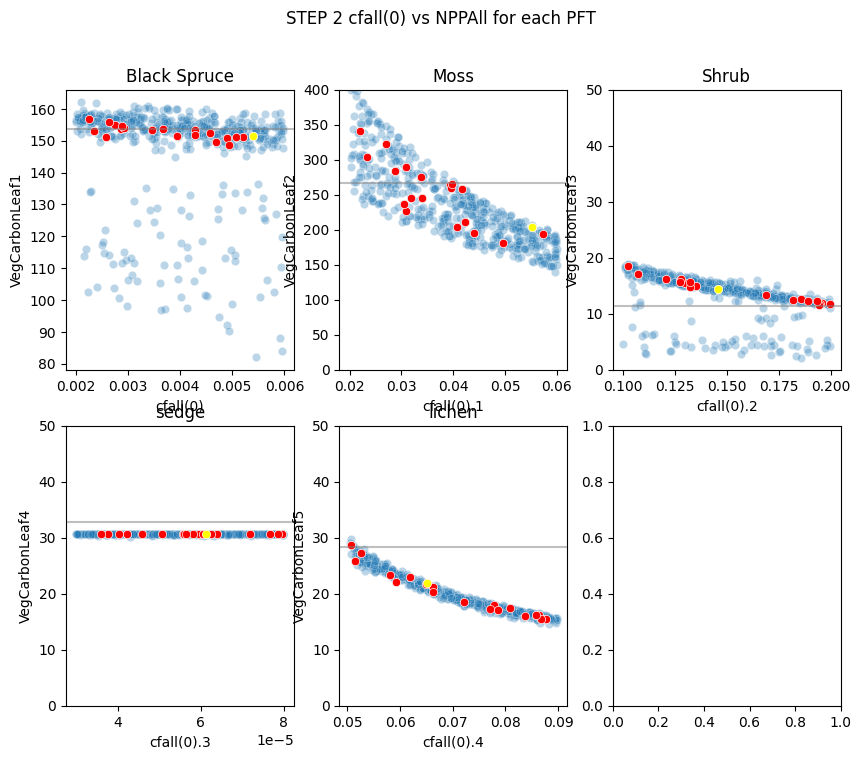

In [183]:
if STEP == 3:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 cfall(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    
    axes[0,1].axhline(targets['VegCarbonLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss')
    axes[0,1].set_ylim(0, 400)
    
    axes[0,2].axhline(targets['VegCarbonLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')
    axes[0,2].set_ylim(0, 50)
    
    axes[1,0].axhline(targets['VegCarbonLeaf4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('sedge')
    axes[1,0].set_ylim(0, 50)
    
    axes[1,1].axhline(targets['VegCarbonLeaf5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], color='yellow',legend=False)
    axes[1,1].title.set_text('lichen')
    axes[1,1].set_ylim(0, 50)

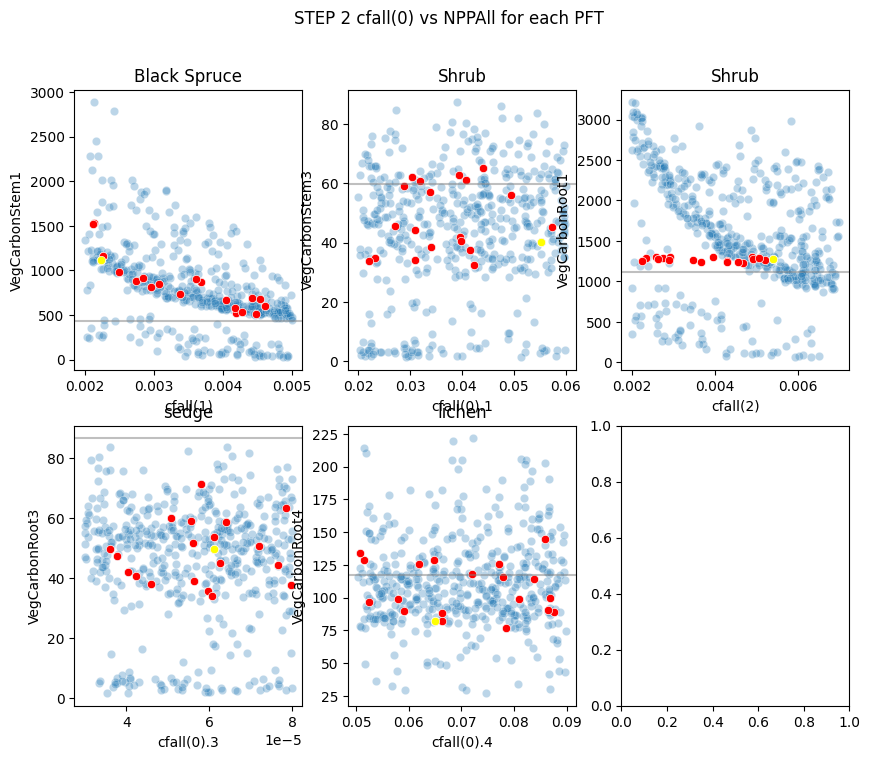

In [205]:
if STEP == 3:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 cfall(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonStem1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1)', y='VegCarbonStem1', ax=axes[0,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(1)', y='VegCarbonStem1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1)', y='VegCarbonStem1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    
    axes[0,1].axhline(targets['VegCarbonStem3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).1', y='VegCarbonStem3', ax=axes[0,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).1', y='VegCarbonStem3', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).1', y='VegCarbonStem3', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Shrub')

    
    axes[0,2].axhline(targets['VegCarbonRoot1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2)', y='VegCarbonRoot1', ax=axes[0,2], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0)', y='VegCarbonRoot1', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y='VegCarbonRoot1', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')

    
    axes[1,0].axhline(targets['VegCarbonRoot3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).3', y='VegCarbonRoot3', ax=axes[1,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).3', y='VegCarbonRoot3', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).3', y='VegCarbonRoot3', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('sedge')

    
    axes[1,1].axhline(targets['VegCarbonRoot4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).4', y='VegCarbonRoot4', ax=axes[1,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).4', y='VegCarbonRoot4', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).4', y='VegCarbonRoot4', ax=axes[1,1], color='yellow',legend=False)
    axes[1,1].title.set_text('lichen')


In [184]:
results.sort_values(by='mean_rmse')[-15:].index

Int64Index([477, 209, 429, 414, 188, 373, 85, 233, 62, 26, 407, 236, 446, 420,
            126],
           dtype='int64')

In [273]:
results.iloc[results['rmse'].idxmin()]

CarbonShallow           4.657250e+03
CarbonDeep              6.637357e+04
CarbonMineralSum        4.490167e+04
OrganicNitrogenSum      3.299904e+03
AvailableNitrogenSum    6.156386e+00
micbnup                 4.087075e-02
kdcrawc                 3.579677e-01
kdcsoma                 3.345949e-02
kdcsompr                1.466908e-03
kdcsomcr                8.261177e-08
r2                               NaN
rmse                    2.559769e-03
rmse_scaled             0.000000e+00
overall_accuracy                 NaN
mean_rmse               1.279884e-03
mean_r2                          NaN
Name: 112, dtype: float64

In [286]:
def spaghetti_match_plot(df_x,df_y,logy=False):
    ''' plots the spaghetti plot of modeled v.s. observed values 
        df_x: parameter dataframe
        df_y: model output dataframe
        logy: True enables the logplot option
    '''
    fig, ax=plt.subplots()
    #ax = df_y.transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5))
    
    nrange=range(len(df_y.columns))
    df_x.plot(logy=logy,legend=True,style="o",color='red',xticks=nrange, rot=90, label="Targets", ax=ax);
    
    top=results.sort_values(by='rmse', ascending=False)[:10].index
    results[target_vars].iloc[results['rmse'].idxmin()].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    #results[target_vars].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    #results[target_vars].iloc[41].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    results[target_vars].iloc[top].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='red',ax=ax)
    
    df_x.plot(logy=logy,legend=False,style="o",color='red',xticks=nrange, rot=90,ax=ax)
    ax.set_xticklabels(df_y.columns,fontsize=12)
    #plt.ylim(10e-5, 2000)
    
target_df=pd.DataFrame(targets).reset_index()
target_df.columns=['variable', 'value']

In [262]:
if STEP==2:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)

In [263]:
if STEP==3:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)

In [264]:
for val in results[calib_params_flat].iloc[results['overall_accuracy'].idxmax()].values:
    print(f'- {val}')

TypeError: Cannot index by location index with a non-integer key

In [287]:
corr = results[target_vars + calib_params_flat].corr()

corr= corr.drop(columns=calib_params_flat)
corr = corr.loc[calib_params_flat]


<AxesSubplot:>

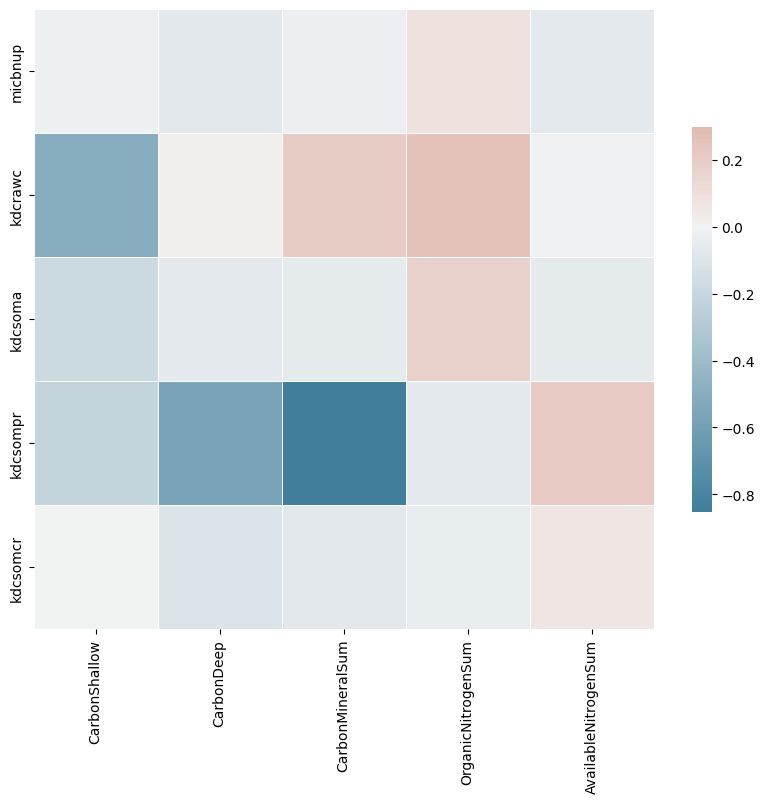

In [288]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [289]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


minmax=results[calib_params_flat].iloc[top].apply(minMax)

In [290]:
for column in minmax.columns:
    print('- Uniform({}, {})'.format(minmax[column]['min'], minmax[column]['max']))

- Uniform(1.4407818395790244, 1.4407818395790244)
- Uniform(0.4024449290026228, 0.4024449290026228)
- Uniform(0.0113407825557282, 0.0113407825557282)
- Uniform(0.0026550632203939, 0.0026550632203939)
- Uniform(3.835961767650723e-07, 3.835961767650723e-07)


In [291]:
targets

CarbonShallow            4362.190000
CarbonDeep              22396.020000
CarbonMineralSum        45220.400000
OrganicNitrogenSum       2748.367000
AvailableNitrogenSum        6.153826
Name: 500, dtype: float64

In [292]:
for index, row in minmax.iterrows():
    print(row)


micbnup     1.440782e+00
kdcrawc     4.024449e-01
kdcsoma     1.134078e-02
kdcsompr    2.655063e-03
kdcsomcr    3.835962e-07
Name: min, dtype: float64
micbnup     1.440782e+00
kdcrawc     4.024449e-01
kdcsoma     1.134078e-02
kdcsompr    2.655063e-03
kdcsomcr    3.835962e-07
Name: max, dtype: float64


In [306]:
results.loc[results['kdcrawc']>results['kdcsoma']].sort_values(by='mean_rmse')[-50:]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
365,3427.804105,62084.805408,41822.210780,3796.530509,2.093042,0.273496,0.242554,0.030284,0.018399,6.514363e-07,NaN,4.060784,0.009703,NaN,2.035243,NaN
342,2899.117167,35165.505829,39512.975418,3837.588097,2.046958,1.883882,0.237761,0.055878,0.061372,1.300057e-08,NaN,4.106868,0.009813,NaN,2.058340,NaN
35,4584.566914,44921.143146,28352.473129,3525.082247,2.015181,1.164870,0.039930,0.009656,0.228347,3.372483e-07,NaN,4.138645,0.009889,NaN,2.074267,NaN
75,3414.751646,60910.282220,43780.470145,3688.360037,1.992910,0.385955,0.766837,0.032940,0.009016,7.509105e-09,NaN,4.160916,0.009942,NaN,2.085429,NaN
391,4142.790137,63623.856592,44117.020226,3731.541521,1.984902,0.522608,0.899403,0.074132,0.006906,2.159957e-10,NaN,4.168924,0.009962,NaN,2.089443,NaN
429,4211.849522,61648.680334,37207.019602,3701.437494,1.959632,0.094187,0.189333,0.009211,0.051275,3.275278e-05,NaN,4.194194,0.010022,NaN,2.102108,NaN
336,2701.918852,31355.324136,46927.591145,3590.674339,1.957071,2.886776,0.947083,0.568111,0.010888,1.837296e-08,NaN,4.196755,0.010028,NaN,2.103392,NaN
362,2904.346166,35232.654578,42369.107993,3785.339396,1.955401,2.261531,0.321097,0.033275,0.039353,2.595504e-10,NaN,4.198425,0.010032,NaN,2.104229,NaN
56,3336.274856,56984.204791,36157.937296,3873.140298,1.928858,0.197009,0.205859,0.020050,0.060368,9.509621e-07,NaN,4.224968,0.010096,NaN,2.117532,NaN
192,2971.934893,69157.064719,44309.502270,3860.897383,1.880934,0.010582,1.184166,0.255682,0.004998,1.160245e-08,NaN,4.272892,0.010211,NaN,2.141551,NaN


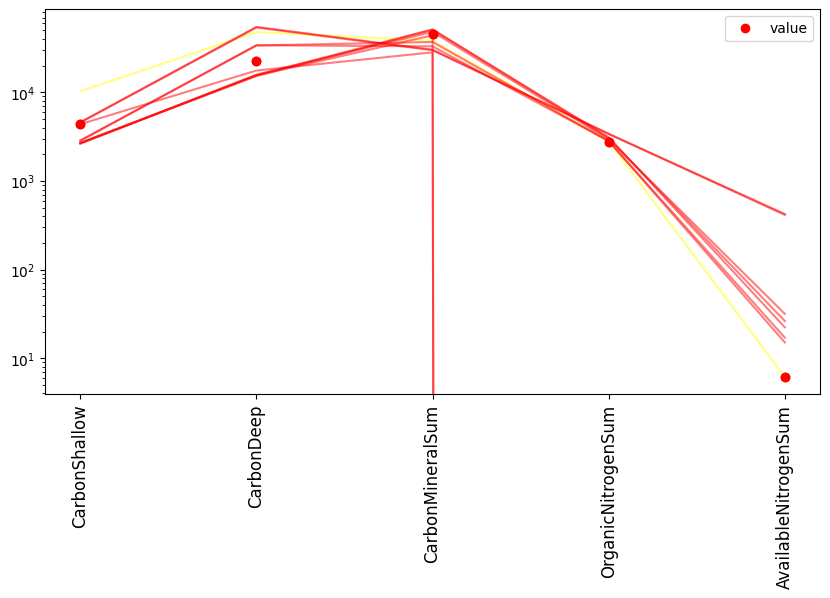

In [294]:
if STEP==4:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)


In [303]:
results.sort_values(by='CarbonDeep', ascending=False).head(100)

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
99,5245.318952,105807.495157,44664.470777,3495.453913,6.639834,0.021454,0.087804,0.143669,0.000124,4.120685e-09,NaN,0.486008,0.001144,NaN,0.243576,NaN
10,5057.640030,98026.527145,45036.153518,3503.568465,6.940673,0.014280,0.156447,0.027414,0.000131,1.112899e-09,NaN,0.786847,0.001864,NaN,0.394356,NaN
184,4935.352111,97795.272241,44732.775862,3547.322963,6.760137,0.068493,0.132038,0.155606,0.000284,4.498128e-06,NaN,0.606311,0.001432,NaN,0.303872,NaN
267,4936.994741,97420.205881,44975.670927,3542.940453,6.816844,0.039737,0.165992,0.045208,0.000162,3.838852e-10,NaN,0.663018,0.001568,NaN,0.332293,NaN
387,4849.888977,96753.961722,44810.784100,3570.982302,6.559154,0.103315,0.163236,0.125748,0.000146,1.268296e-06,NaN,0.405328,0.000951,NaN,0.203139,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,4589.873069,82330.065796,44746.494187,3659.824825,6.490065,0.076671,0.362198,0.139886,0.001584,2.255832e-08,NaN,0.336239,0.000785,NaN,0.168512,NaN
360,4512.825665,82324.680284,44950.737658,3628.835372,5.279858,1.403121,0.540374,0.312322,0.000159,5.657189e-07,NaN,0.873968,0.002073,NaN,0.438021,NaN
254,7706.284846,82247.576162,44760.032153,2888.945364,5.278950,1.873802,0.054174,0.019846,0.000355,1.474600e-05,NaN,0.874876,0.002075,NaN,0.438476,NaN
341,7718.769444,82025.355138,44693.090967,2901.993981,5.622545,0.738594,0.181776,0.005901,0.000146,5.269818e-05,NaN,0.531281,0.001252,NaN,0.266267,NaN


In [305]:
results[(results['AvailableNitrogenSum']>4) & (results['CarbonDeep']<30000)]
#203
#225

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
24,14049.769875,25223.063992,41410.148775,2899.788454,5.173320,0.983306,0.013278,0.011699,0.019370,7.260500e-06,NaN,0.980506,0.002328,NaN,0.491417,NaN
33,12210.185607,25719.932257,30170.738504,2750.992998,5.410320,0.010851,0.016619,0.022848,0.235903,6.894340e-09,NaN,0.743506,0.001760,NaN,0.372633,NaN
37,2675.211579,15718.422945,51399.430869,3112.292371,22.301596,0.022587,1.359477,0.030349,0.049813,4.926343e-07,NaN,16.147770,0.038642,NaN,8.093206,NaN
38,12550.830821,25667.441794,41281.839807,2944.753696,5.259936,0.735076,0.014025,0.152945,0.017405,3.086381e-10,NaN,0.893890,0.002120,NaN,0.448005,NaN
58,12233.718273,29075.947778,33025.070355,2722.903811,4.961296,0.015502,0.014604,0.007591,0.105651,3.894417e-05,NaN,1.192530,0.002835,NaN,0.597683,NaN
67,2368.374340,17785.771001,36210.152195,2592.012803,4.633826,0.049669,1.258814,0.147770,0.212372,2.108174e-09,NaN,1.520000,0.003619,NaN,0.761809,NaN
122,12253.718532,29193.402319,40675.555515,2800.726309,5.392295,0.118746,0.013679,0.015133,0.023507,7.588758e-10,NaN,0.761531,0.001803,NaN,0.381667,NaN
148,2627.628255,15841.365105,48212.288346,2948.574441,31.620742,0.118011,0.516923,0.103427,0.029984,1.730848e-05,NaN,25.466916,0.060954,NaN,12.763935,NaN
157,12208.181563,26838.645172,34529.350190,2868.753739,5.226961,1.277659,0.013781,0.066735,0.078012,1.965431e-07,NaN,0.926865,0.002199,NaN,0.464532,NaN
158,2447.427470,18878.789411,38264.354507,2577.514828,4.915028,0.033507,0.623328,0.113446,0.179463,1.365132e-09,NaN,1.238798,0.002946,NaN,0.620872,NaN


In [35]:
targets

CarbonShallow            4362.190000
CarbonDeep              22396.020000
CarbonMineralSum        45220.400000
OrganicNitrogenSum       2748.367000
AvailableNitrogenSum        6.153826
Name: 500, dtype: float64

In [309]:
results.iloc[[203, 225, 438, 301]]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
203,2383.595964,18124.266845,37335.983942,2527.993319,5.123681,0.011015,0.739373,0.370088,0.187866,3.734206e-07,NaN,1.030145,0.002447,NaN,0.516296,NaN
225,2419.670814,18819.221664,50774.950030,2851.829235,4.079829,0.056281,0.868126,0.556908,0.030287,1.003142e-10,NaN,2.073997,0.004946,NaN,1.039471,NaN
438,3607.330884,28100.525702,33129.338975,3662.936106,1.835952,2.284383,1.046668,0.011905,0.235779,3.741515e-06,NaN,4.317874,0.010318,NaN,2.164096,NaN
301,2355.215496,17661.991150,34663.538702,3592.513184,1.752973,1.774089,1.478971,0.584966,0.155811,2.649804e-10,NaN,4.400853,0.010517,NaN,2.205685,NaN


In [37]:
print(results.iloc[[144,63,400,495]]['micbnup'].min())
print(results.iloc[[144,63,400,495]]['micbnup'].max())


0.0131632338106962
1.391369618505347


In [38]:
print(results.iloc[[144,63,400,495]]['kdcrawc'].min())
print(results.iloc[[144,63,400,495]]['kdcrawc'].max())

0.0140073185872174
0.2275708623199219


In [39]:
print(results.iloc[[144,63,400,495]]['kdcsoma'].min())
print(results.iloc[[144,63,400,495]]['kdcsoma'].max())

0.0418437562796824
0.2373394743615009


In [40]:
print(results.iloc[[144,63,400,495]]['kdcsompr'].min())
print(results.iloc[[144,63,400,495]]['kdcsompr'].max())

0.0019752729062869
0.159317033067128


In [41]:
print(results.iloc[[144,63,400,495]]['kdcsomcr'].min())
print(results.iloc[[144,63,400,495]]['kdcsomcr'].max())

1.0871319489523084e-10
2.423170146988913e-05


(0.0, 30.0)

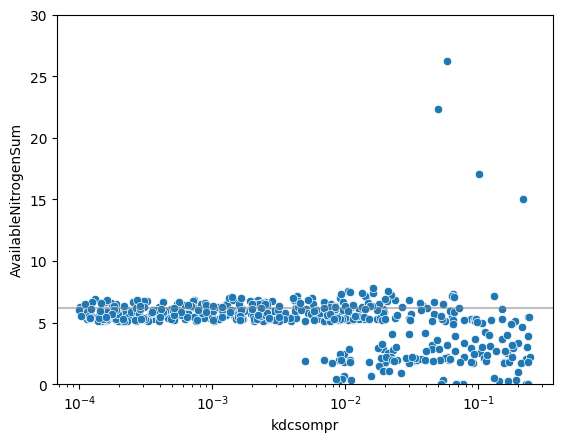

In [295]:
sns.scatterplot(data=results, x='kdcsompr', y='AvailableNitrogenSum')
plt.axhline(targets['AvailableNitrogenSum'], color='grey', alpha=0.5)
plt.xscale('log')
plt.ylim(0,30)

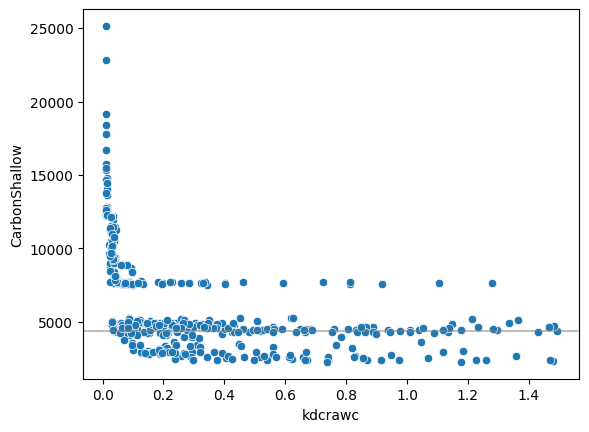

In [296]:
sns.scatterplot(data=results, x='kdcrawc', y='CarbonShallow')
plt.axhline(targets['CarbonShallow'], color='grey', alpha=0.5)

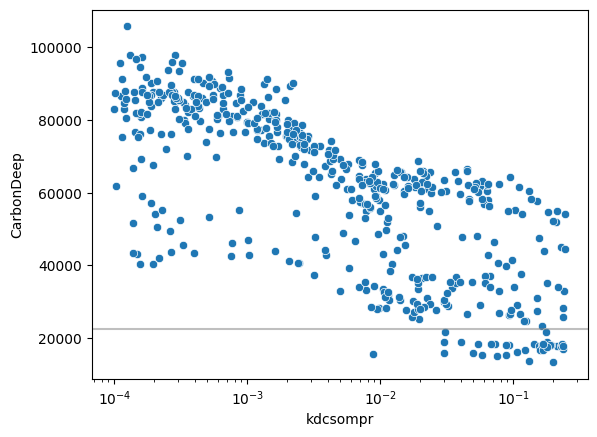

In [297]:
sns.scatterplot(data=results, x='kdcsompr', y='CarbonDeep')
plt.axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
plt.xscale('log')

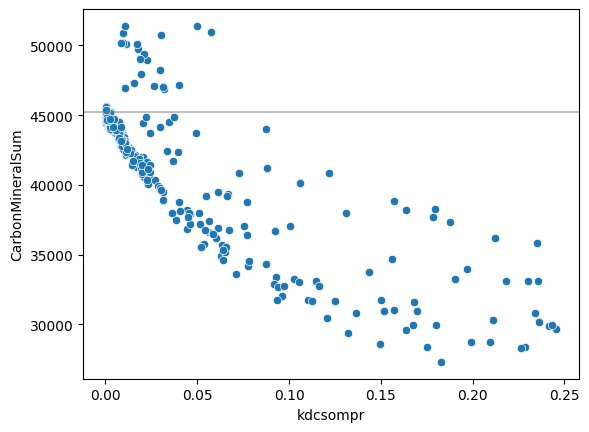

In [298]:
sns.scatterplot(data=results, x='kdcsompr', y='CarbonMineralSum')
plt.axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)

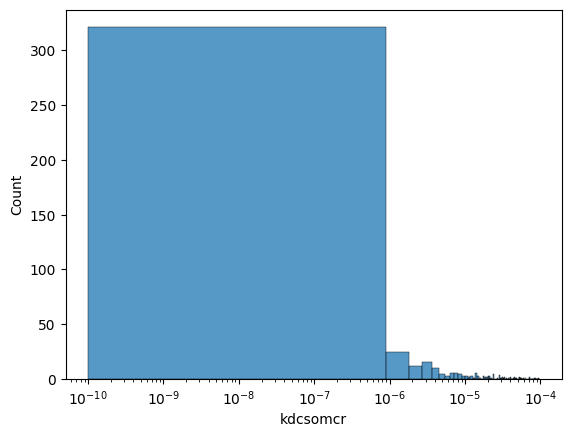

In [46]:
sns.histplot(data=results, x='kdcsomcr')
plt.xscale("log")

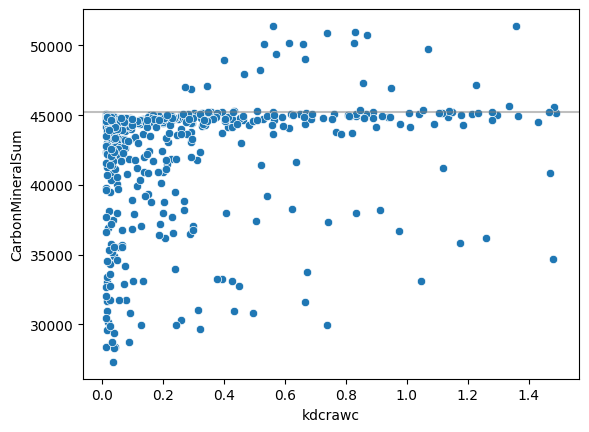

In [299]:
sns.scatterplot(data=results, x='kdcrawc', y='CarbonMineralSum')
plt.axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)

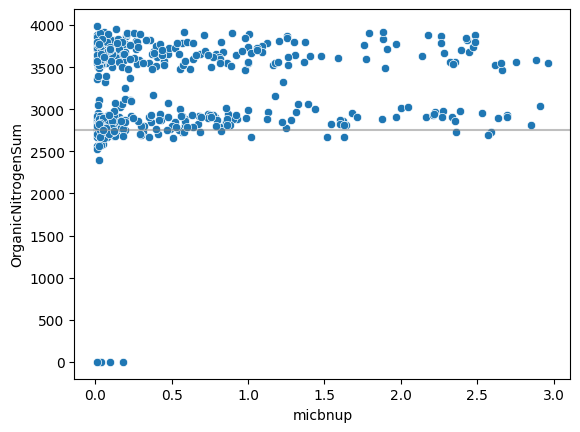

In [300]:
sns.scatterplot(data=results, x='micbnup', y='OrganicNitrogenSum')
plt.axhline(targets['OrganicNitrogenSum'], color='grey', alpha=0.5)

In [49]:
pd.melt(pd.DataFrame(targets))

,variable,value
0,500,4362.190000
1,500,22396.020000
2,500,45220.400000
3,500,2748.367000
4,500,6.153826


In [50]:
pd.DataFrame(targets)

,500
CarbonShallow,4362.190000
CarbonDeep,22396.020000
CarbonMineralSum,45220.400000
OrganicNitrogenSum,2748.367000
AvailableNitrogenSum,6.153826


In [51]:
targets.index

Index(['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum',
       'AvailableNitrogenSum'],
      dtype='object')

In [52]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import loguniform

In [53]:
from scipy.stats import loguniform

def generate_loguniform_sample(a, b, size=10):
    """
    Generate a random sample of size 'size' from a log uniform distribution for elements within the interval (a, b).
    
    Parameters:
        a (float): Lower bound of the interval.
        b (float): Upper bound of the interval.
        size (int): Number of elements in the sample (default is 10).
    
    Returns:
        numpy.ndarray: An array of size 'size' containing random samples from the log uniform distribution.
    """
    min_val = a
    max_val = b
    spread=b-a
    loguniform_samples = loguniform.rvs(min_val,max_val,size=size)
    return loguniform_samples

# Example usage:
a = 1e-15
b = 1e-12
sample = generate_loguniform_sample(a, b, size=500)
print("Generated Sample:", sample)

Generated Sample: [8.84522830e-13 2.35451477e-13 6.26490252e-15 1.02499831e-15
 1.12211589e-15 2.58574768e-14 5.75747075e-15 5.93058191e-13
 1.22247079e-13 1.77337524e-13 6.40367993e-15 1.42866611e-15
 3.33663397e-15 4.57539191e-14 1.77692654e-15 9.12509668e-13
 2.23072660e-13 1.16557522e-15 1.07647521e-13 3.62697410e-15
 1.48359879e-15 7.33742853e-13 2.83760136e-13 3.58919326e-14
 3.18952807e-15 2.10550856e-15 1.18419893e-14 7.05439957e-15
 1.77048606e-15 5.54863391e-15 2.57970647e-13 8.92684977e-15
 2.86691778e-13 1.65716086e-14 1.57906180e-15 3.21259524e-14
 5.22265652e-13 2.43168976e-13 4.82355918e-15 7.13856048e-14
 5.30194334e-15 6.12736360e-15 1.36221349e-14 1.12055999e-13
 2.25160481e-15 1.19922227e-13 5.71489187e-15 1.09875693e-14
 2.19315288e-13 3.42660652e-13 2.48119599e-15 8.58283994e-14
 1.35990249e-13 1.13607066e-14 7.16064515e-15 1.87988472e-14
 7.66118173e-14 2.35985309e-13 1.14567468e-13 7.05780014e-14
 1.75912854e-14 5.05925082e-13 7.01854205e-13 3.30899583e-15
 2.157